# LAB3: PCA + conjunto de dados MNIST

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Ana Sofia Preto Oliveira
## Número: 39275

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab3.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Conjunto de dados $\texttt{MNISTsmall.p}$:

# Pergunta 1: Considere os dígitos "4", "7" e "9"  dos dados (3000 dígitos de treino e 1500 de teste).
## a) Calcule a matriz de PCA para os 3000 dígitos de treino. Use um número de componentes principais de modo aos dados projetados terem $80\%$ da variância total dos dados originais. Especifique (imprima) qual o número de componentes obtidas. 
## b) Visualize em forma de imagem, as três primeiras componetes principais (3 imagens de $28\times28$).
## c) Aplique a transformação PCA ao primeiro dígito "4" e ao primeiro dígito "9" do conjunto de teste. Visualize em forma de imagem os dígitos originais e os dígitos reconstruídos após a transformação PCA inversa.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle

from sklearn.decomposition import PCA

fN = '/Users/anaso/Documents/AA/AA-22-23/FichasAula/Ficha3/MNISTsmall.p'

In [3]:
D = pickle.load(open(fN, 'rb'))

X = D['X']
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]

# Digitos 4, 7 e 9
# Treino
X1 = X1[:, (y1==4) | (y1==7) | (y1==9)]
y1 = y1[(y1==4) | (y1==7) | (y1==9)]

# Teste
X2 = X2[:, (y2==4) | (y2==7) | (y2==9)]
y2 = y2[(y2==4) | (y2==7) | (y2==9)]

print(X1.shape, X2.shape)


(784, 3000) (784, 1500)


In [4]:
Cx = np.cov(X1)
u, V = la.eig(Cx)
u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

un = u/np.sum(u)
ucum = np.cumsum(un)

n_components = np.sum(ucum <= 0.8)

print("Número de componentes: ", n_components)


Número de componentes:  34


Text(0.5, 1.0, '3ªcomponente')

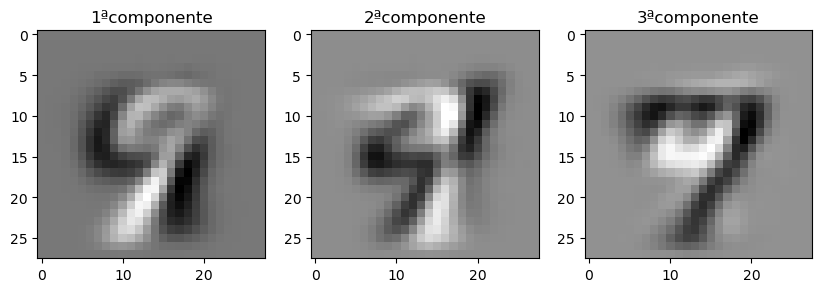

In [5]:
W = V[:, :n_components]

W1 = W[:, 0].reshape(28,28)
W2 = W[:, 1].reshape(28,28)
W3 = W[:, 2].reshape(28,28)

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(W1, cmap='binary')
plt.title("1ªcomponente")

plt.subplot(132)
plt.imshow(W2, cmap='binary')
plt.title("2ªcomponente")

plt.subplot(133)
plt.imshow(W3, cmap='binary')
plt.title("3ªcomponente")


Text(0.5, 1.0, 'Primeiro nove reconstruído')

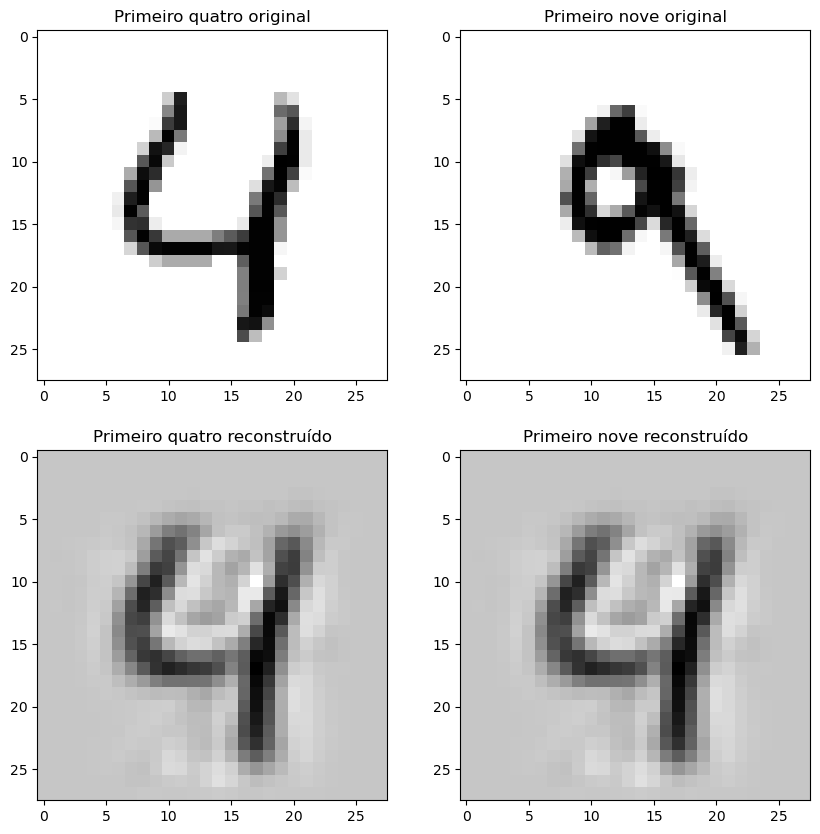

In [6]:
quatro = X2[:, y2==4][:, 0]
nove = X2[:, y2==9][:, 0]

amostras = np.vstack((quatro, nove)).T

amostras_pca = np.dot(W.T, amostras)
amostras_reconstruídas = np.dot(W, amostras_pca)

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(amostras[:, 0].reshape(28,28), cmap='binary')
plt.title("Primeiro quatro original")

plt.subplot(222)
plt.imshow(amostras[:, 1].reshape(28,28), cmap='binary')
plt.title("Primeiro nove original")

plt.subplot(223)
plt.imshow(amostras_reconstruídas[:, 0].reshape(28,28), cmap='binary')
plt.title("Primeiro quatro reconstruído")

plt.subplot(224)
plt.imshow(amostras_reconstruídas[:, 0].reshape(28,28), cmap='binary')
plt.title("Primeiro nove reconstruído")



# Pergunta 2: Considere todos os dados
## a) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $75\%$ da variância total dos dados e aplique a transformação aos dados de treino e teste. 
## b) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados de treino transformados, e calcule a matriz de confusão e o número total de erros nos dados de teste transformados.
## c) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $75\%$ da variância total dos dados, e os dados transformardos terem média nula e variância unitária em cada dimensão. Aplique a transformação aos dados de treino e teste. 
## d) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados transformados da alínea anterior, e calcule a matriz de confusão e o número total de erros nos dados de teste.

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [8]:
pca = PCA(n_components=0.75).fit(X1.T, y1)
X1p = pca.transform(X1.T)
X2p = pca.transform(X2.T)


In [9]:
svm = svm.fit(X1p, y1)
y2e = svm.predict(X2p)

CM = confusion_matrix(y2, y2e)
erros = np.sum(y2 != y2e)

print("Matriz de confusão: \n", CM)
print("Número total de erros nos dados de treino: ", erros)


Matriz de confusão: 
 [[480   2  18]
 [ 12 473  15]
 [ 15  10 475]]
Número total de erros nos dados de treino:  72


In [10]:
pca = PCA(n_components=0.75, whiten=True).fit(X1.T, y1)
X1p = pca.transform(X1.T)
X2p = pca.transform(X2.T)


In [11]:
svm = svm.fit(X1p, y1)
y2e = svm.predict(X2p)

CM = confusion_matrix(y2, y2e)
erros = np.sum(y2 != y2e)

print("Matriz de confusão: \n", CM)
print("Número total de erros nos dados de treino: ", erros)

Matriz de confusão: 
 [[487   1  12]
 [  7 482  11]
 [ 15   9 476]]
Número total de erros nos dados de treino:  55
